In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from gan.GAN import GanNet
import tensorflow_datasets as tfds
import numpy as np

In [2]:
NET_NAME = 'alfa'
BATCH_SIZE = 32
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32

In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
# Load and prepare dataset
(training_set, validation_set), dataset_info = tfds.load(
    'oxford_flowers102',
    split=['test', 'validation'],
    with_info=True,
    as_supervised=True,
)
# Get size of datasets from dataset_info
dataset_size = dataset_info.splits['test'].num_examples
print(f'Dataset size is: {dataset_size}')
num_classes = dataset_info.features['label'].num_classes
print(f'Number of different images class labels: {num_classes}')

Dataset size is: 6149
Number of different images class labels: 102


In [5]:
# Preprocessing images
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    # image = (image - 127.5) / 127.5 # Normalize [-1, 1]
    image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

    return image, label

train_batches = training_set.shuffle(dataset_size//4).map(format_image)

get_label_name = dataset_info.features['label'].int2str
labels_strings = { _: get_label_name(_) for _ in range(num_classes) }

numpy_train_batches_images = np.array([_[0] for _ in train_batches])
numpy_train_batches_labels = np.array([_[1] for _ in train_batches])

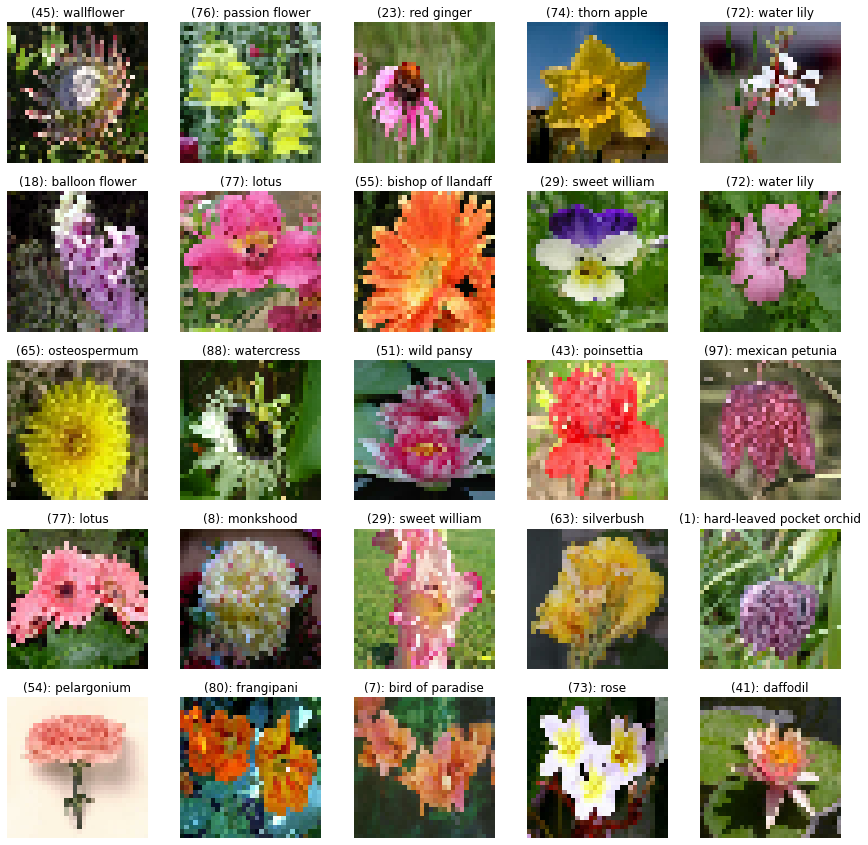

In [6]:
rows = 5
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
cnt = 0

for i in range(rows):
    for j in range(cols):
        image = numpy_train_batches_images[cnt, :, :, :]
       #  image = (image + 1) / 2.0
        image = np.clip(image, 0, 1)
        label = numpy_train_batches_labels[cnt]
        label_str = labels_strings[label]
        axs[i, j].set_title(f'({label}): {label_str}')
        axs[i, j].imshow(np.squeeze(image), cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
fig.set_facecolor('white')
plt.show()

In [7]:
gan = GanNet(
          net_name=NET_NAME,
          batch_size=BATCH_SIZE,
          batches_per_epoch=40,
          image_width=IMAGE_WIDTH,
          image_height=IMAGE_HEIGHT,
          number_of_channels=3,
          latent_dimension=100,
          training_data=numpy_train_batches_images,
          )

In [8]:
gan.define_discriminator()
gan.define_generator()
gan.define_gan()

Number of images in dataset: 6149
Batches per epoch: 40
Half batch size is: 16
---> Archive old networks data: /home/kamil/Repositories/GAN/gan/alfa_data

----> Epoch: 1 1/10
40/40 [==============================] - 5s 69ms/step

D_real_loss: 0.7879558205604553 D_fake_loss: 0.45514988899230957 G_loss: 1.0707629919052124
D_real_acc: 0.375 D_fake_acc: 1.0

----> Epoch: 2 2/10
40/40 [==============================] - 3s 68ms/step

D_real_loss: 0.5038961172103882 D_fake_loss: 0.846010684967041 G_loss: 0.6252647638320923
D_real_acc: 1.0 D_fake_acc: 0.0

----> Epoch: 3 3/10
40/40 [==============================] - 3s 73ms/step

D_real_loss: 0.6571872234344482 D_fake_loss: 0.7398675680160522 G_loss: 0.7027906775474548
D_real_acc: 0.5625 D_fake_acc: 0.1875

----> Epoch: 4 4/10
40/40 [==============================] - 3s 69ms/step

D_real_loss: 0.7425758242607117 D_fake_loss: 0.7173693180084229 G_loss: 0.720901608467102
D_real_acc: 0.3125 D_fake_acc: 0.3125

----> Epoch: 5 5/10
40/40 [=========

----> Load epoch number: 10 from file /home/kamil/Repositories/GAN/gan/alfa_data/.epoch


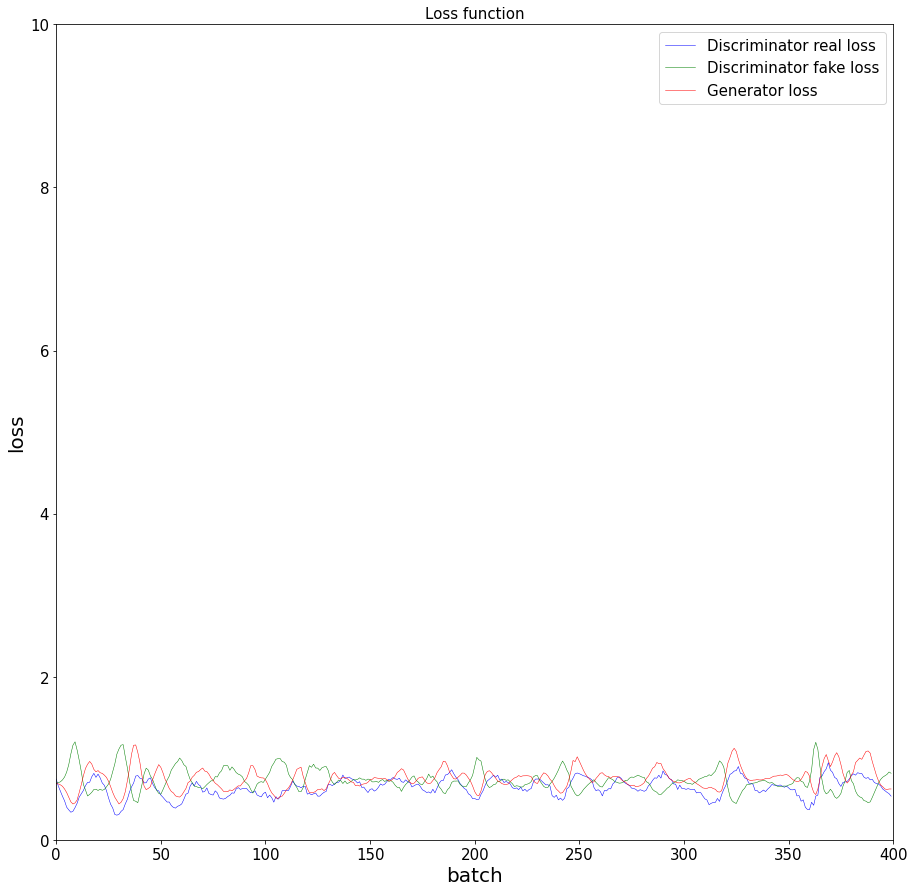

In [9]:
gan.train(number_of_epochs=10, load_past_model=False)
gan.plot_loss()

Number of images in dataset: 6149
Batches per epoch: 40
Half batch size is: 16
----> Load epoch number: 10 from file /home/kamil/Repositories/GAN/gan/alfa_data/.epoch

----> Epoch: 10 1/10
40/40 [==============================] - 3s 71ms/step

D_real_loss: 0.7065997123718262 D_fake_loss: 0.6405245661735535 G_loss: 0.8828208446502686
D_real_acc: 0.4375 D_fake_acc: 0.8125

----> Epoch: 11 2/10
40/40 [==============================] - 3s 70ms/step

D_real_loss: 0.6596506237983704 D_fake_loss: 0.7095861434936523 G_loss: 0.7121033668518066
D_real_acc: 0.6875 D_fake_acc: 0.3125

----> Epoch: 12 3/10
40/40 [==============================] - 3s 71ms/step

D_real_loss: 0.6394404768943787 D_fake_loss: 0.7486125230789185 G_loss: 0.7351082563400269
D_real_acc: 0.8125 D_fake_acc: 0.125

----> Epoch: 13 4/10
40/40 [==============================] - 3s 71ms/step

D_real_loss: 0.6665663719177246 D_fake_loss: 0.7685452699661255 G_loss: 0.691736102104187
D_real_acc: 0.6875 D_fake_acc: 0.1875

----> Epoc

----> Load epoch number: 19 from file /home/kamil/Repositories/GAN/gan/alfa_data/.epoch


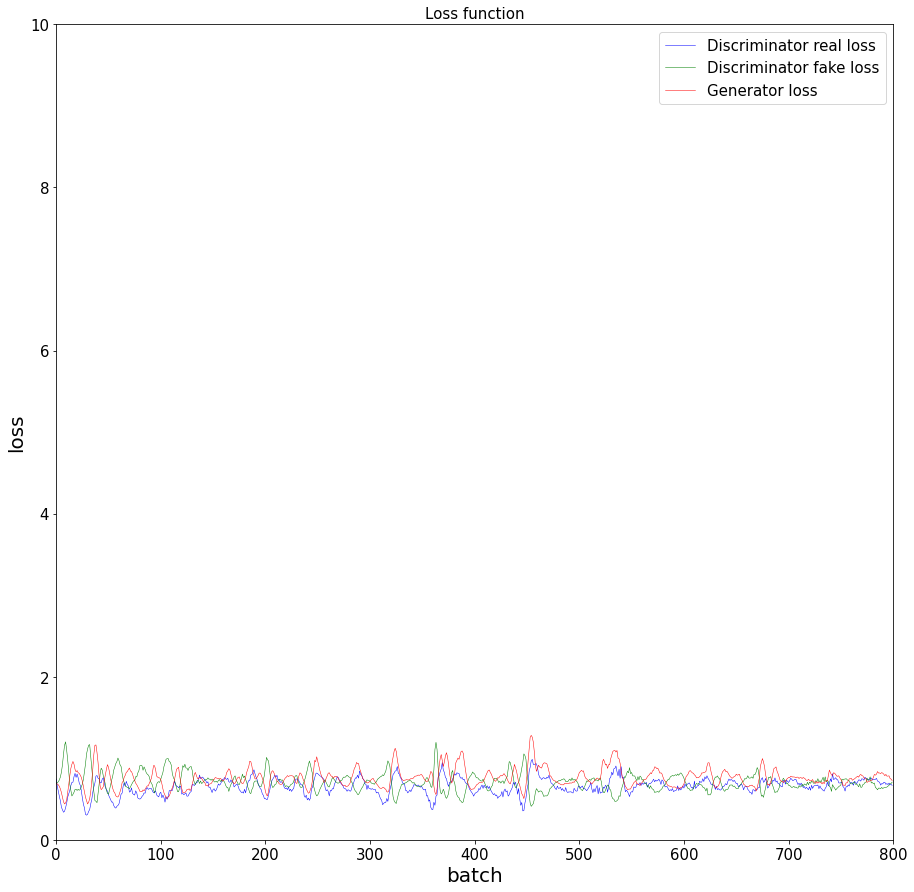

In [10]:
gan.train(number_of_epochs=10, load_past_model=True)
gan.plot_loss()

In [11]:
gan.visualize_model()